<h1 style="text-align:center;">Assignment 3.1</h1><br>
<div class="alert alert-block alert-info" style="text-align:left;">
    <h3 style="text-align:left;"> Part 1: Expand the basic code for building a DNN on the Pima Indian Diabetic Dataset to include:</h3>
        <ol style="list-style: lower-latin;">
            <li>Pre-process the data by scaling/standardizing the 8 columns.</li>
            <br>
            <li>Split the entire dataset into three parts instead of two as we currently do. One is train, two is validation, and then a test set. Build DNN model with train data, tune hyper-parameters with validation data, and finally evaluate performance on the test data.</li>
            <br>
            <li>Make Epoch versus train set accuracy, and validation set accuracy </li> 
            <br>
            <li>Report results using nice ROC curves, report AUC values. </li>
    </ol>
</div>   

## Table of Contents:

1. [Imports and Configuration](#1.-Imports-and-Configuration)
2. [Reading Data into Notebook](#2.-Reading-Data-into-Notebook)
3. [Data Correlation Matrix](#3.-Data-Correlation-Matrix)
4. [Visualise the Dataset](#4.-Visualise-the-Dataset)
5. [Data Cleaning and Transformation](#5.-Data-Cleaning-and-Transformation)
6. [Train - Valid - Test Split](#6.-Train---Valid---Test-Split) 
7. [Scaling - Standardization](#7.-Scaling---Standardization)
8. [Building a DNN Model](#8.-Building-a-DNN-Model)
9. [Epoch Vs Training Accuracy, Validation Accuracy](#9.-Epoch-Vs-Training-Accuracy,-Validation-Accuracy)
10. [Confusion Matrix](#10.-Confusion-Matrix)
11. [ROC Curve](#11.-ROC-Curve)
12. [Area Under Curve (AUC)](#12.-Area-Under-Curve-(AUC))
13. [Conclusion](#13.-Conclusion)

---

>This Kaggle challenge is about predicting the onset of diabetes in 5 years or less. 
Target variable is Outcome. 1 = yes, the person became diabetic in 5 years, and 0 = No, 
the person did not. This is a binary classification problem. Please check out the Kaggle
link here to see feature 
details - https://www.kaggle.com/uciml/pima-indians-diabetes-database/data  
>
>   **Pregnancies**: Number of times pregnant  
   **Glucose**: Plasma glucose concentration over 2 hours in an oral glucose tolerance test  
   **BloodPressure**: Diastolic blood pressure (mm Hg)  
   **SkinThickness**: Triceps skin fold thickness (mm)  
   **Insulin**: 2-Hour serum insulin (mu U/ml)  
   **BMI**: Body mass index (weight in kg/(height in m)2)  
   **DiabetesPedigreeFunction**: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)  
   **Age**: Age (years)  
   **Outcome**: Class variable (0 if non-diabetic, 1 if diabetic)  

---

In [1]:
'''Below code is used to cente the output plots to center. 
Refrerence: https://stackoverflow.com/questions/18380168/center-output-plots-in-the-notebook'''

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

---

## 1. Imports and Configuration

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model
from keras import callbacks 

%matplotlib inline

In [3]:
%pwd

'C:\\Users\\srush\\Documents\\Srushti NEU\\Full Summer 2020\\INFO 6105 Data Science Engineering Methods and Tools\\Assignment\\Assignment 3'

In [4]:
!ls

Assignment 3.1 - DNN Classification.ipynb
Assignment 3.2 - DNN Regression .ipynb
DataSet


In [5]:
#Define a variable that points to this. This will let you avoid typing the long path everytime you need to use it
my_path = 'C:\\Users\\srush\\Documents\\Srushti NEU\\Full Summer 2020\\INFO 6105 Data Science Engineering Methods and Tools\\Assignment\\Assignment 3'

[Scroll Top](#Assignment-3.1)

---

## 2. Reading Data into Notebook

In [6]:
# We read the data from the CSV file
# We placed the dataset under datasets/ sub folder
df = pd.read_csv(f'{my_path}/DataSet/pima-indians-diabetes.data',header = None)


# As the CSV doesn't contain any header, we add column names using the description from the original dataset website(kaggle)
df.columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", 
            "DiabetesPedigreeFunction", "Age", "HasDiabetes"]

# Check the shape of the data: we have 768 rows and 9 columns: the first 8 columns are features while the last one
# is the supervised label (1 = has diabetes, 0 = no diabetes)
df.shape

# Visualise a table with the first rows of the dataset, to better understand the data format
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
HasDiabetes                 768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().values.any()

False

[Scroll Top](#Assignment-3.1)

---

## 3. Data Correlation Matrix

>The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the bettere correlation there is between two characteristics. Let's calculate the correlation matrix for our dataset.

In [9]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HasDiabetes
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


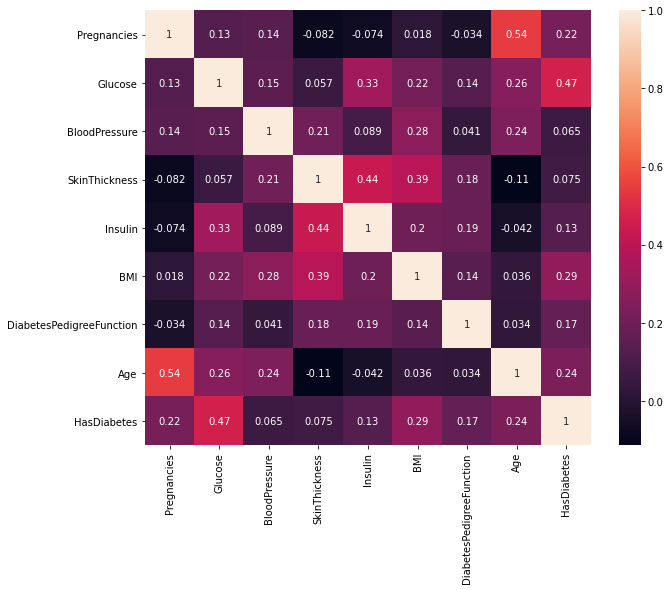

In [10]:
%matplotlib inline
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot = True)

[Scroll Top](#Assignment-3.1)

---

## 4. Visualise the Dataset

C:\Users\srush\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\srush\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\srush\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\srush\Anaconda3\lib\site-packages\pandas\plotting\_matpl

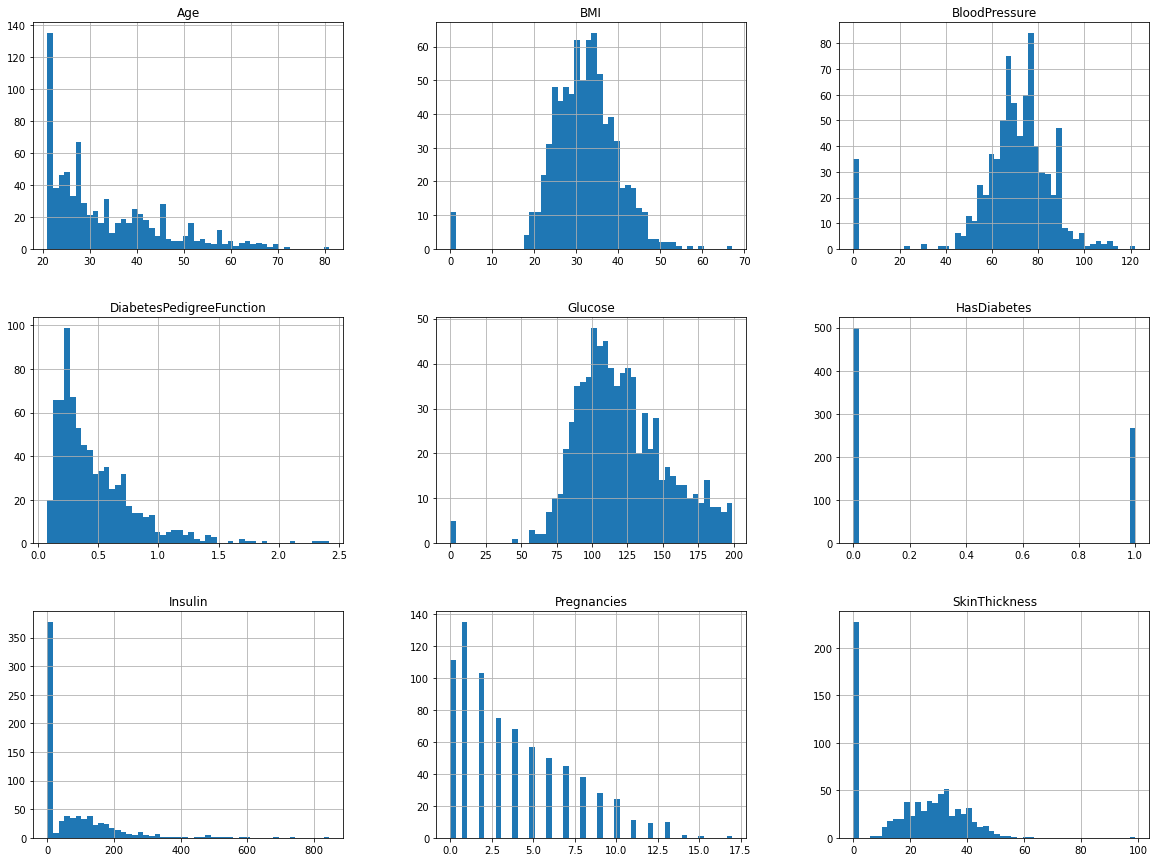

In [11]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

[Scroll Top](#Assignment-3.1)

---

## 5. Data Cleaning and Transformation

>An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 as BMI or for the blood pressure.
>We will calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero.

In [12]:
# Calculate the median value for BMI
median_bmi = df['BMI'].median()

# Substitute it in the BMI column of the dataset where values are 0
df['BMI'] = df['BMI'].replace(to_replace=0, value=median_bmi)

In [13]:
# Calculate the median value for Blood Pressure
median_bloodp = df['BloodPressure'].median()

# Substitute it in the BloodP column of the dataset where values are 0
df['BloodPressure'] = df['BloodPressure'].replace(to_replace=0, value=median_bloodp)

In [14]:
# Calculate the median value for Glucose
median_Glucose = df['Glucose'].median()

# Substitute it in the PlGlcConc column of the dataset where values are 0
df['Glucose'] = df['Glucose'].replace(to_replace=0, value=median_Glucose)

In [15]:
# Calculate the median value for SkinThickness
median_SkinThickness = df['SkinThickness'].median()

# Substitute it in the SkinThick column of the dataset where values are 0
df['SkinThickness'] = df['SkinThickness'].replace(to_replace=0, value=median_SkinThickness)

In [16]:
# Calculate the median value for Insulin
median_Insulin = df['Insulin'].median()

# Substitute it in the Insulin column of the dataset where values are 0
df['Insulin'] = df['Insulin'].replace(to_replace=0, value=median_Insulin)

[Scroll Top](#Assignment-3.1)

---

## 6. Train - Valid - Test Split

In [17]:
#Separate out X (independent features) and y (dependent feature)

X = df.iloc[:, :8]
y = df.iloc[:, 8:9]

In [19]:

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print(X_train.shape,X_val.shape,X_test.shape)

(460, 8) (154, 8) (154, 8)


[Scroll Top](#Assignment-3.1)

---

## 7. Scaling - Standardization

In [20]:
#feature Scaling 
scale = StandardScaler()
scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)
X_val_scaled = scale.fit_transform(X_val)

In [22]:
# copy of datasets
X_train_stand = X_train_scaled.copy()
X_test_stand = X_test_scaled.copy()
X_val_stand = X_val_scaled.copy()

[Scroll Top](#Assignment-3.1)

---

## 8. Building a DNN Model

In [24]:
#initializing model
model = Sequential()

# first hidden layer consists of 32 nodes. The input dimensions are 8 due to there being 8 columns in the training data
model.add(Dense(32, activation='relu', input_dim=8))

# the second hidden layer consists of 16 nodes
model.add(Dense(16, activation='relu'))

# the output layer consists of a single node as we are dealing with binary classification
# the sigmoid activation function 'squashes' the output between 0 and 1
model.add(Dense(1, activation='sigmoid'))

In [25]:
# compile and train the model
print("Compiling and training model...")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_stand, y_train, epochs=20, verbose=False)

Compiling and training model...


In [26]:
# accuracy results (training and validation)
print("Results:")
print("--------")
scores = model.evaluate(X_train_stand, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))
scores = model.evaluate(X_val_stand, y_val, verbose=False)
print("Validation Accuracy: %.2f%%\n" % (scores[1] * 100))

Results:
--------
Training Accuracy: 79.13%

Validation Accuracy: 75.97%



[Scroll Top](#Assignment-3.1)

---

## 9. Epoch Vs Training Accuracy, Validation Accuracy

In [27]:
#Calculating training and validation Accuracy
earlystopping = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)


history = model.fit(X_train_stand, y_train, batch_size = 4,  
                    epochs =50, validation_data =(X_val_stand, y_val),
                    callbacks =[earlystopping]) 

Epoch 1/50
115/115 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.7804 - val_loss: 0.4907 - val_accuracy: 0.7597
Epoch 2/50
115/115 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.7804 - val_loss: 0.4847 - val_accuracy: 0.7468
Epoch 3/50
115/115 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.7978 - val_loss: 0.4877 - val_accuracy: 0.7532
Epoch 4/50
115/115 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.7804 - val_loss: 0.4843 - val_accuracy: 0.7403
Epoch 5/50
115/115 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.8022 - val_loss: 0.4865 - val_accuracy: 0.7403
Epoch 6/50
115/115 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.7891 - val_loss: 0.4857 - val_accuracy: 0.7468
Epoch 7/50
115/115 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.8022 - val_loss: 0.4919 - val_accuracy: 0.7338
Epoch 

In [28]:
# evaluate the model
_, train_acc = model.evaluate(X_train_stand, y_train, verbose=0)
_, test_acc = model.evaluate(X_val_stand, y_val, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.891, Test: 0.708


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


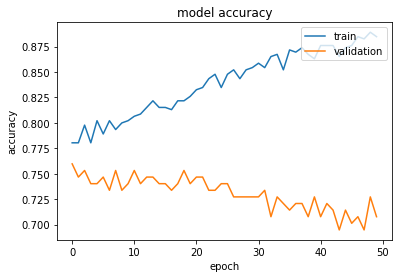

In [29]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

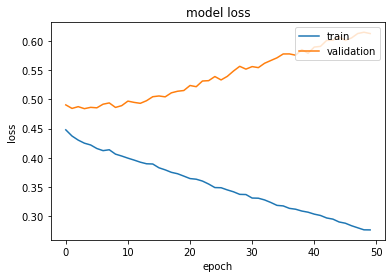

In [30]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

[Scroll Top](#Assignment-3.1)

---

## 10. Confusion Matrix

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Text(33.0, 0.5, 'Actual Value')

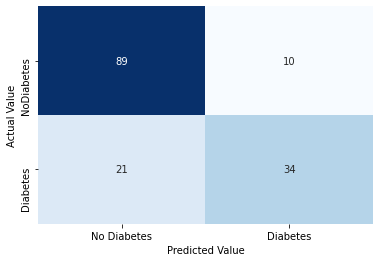

In [31]:
# confusion matrix
yTestPredict = model.predict_classes(X_test_stand)
cMatrix = confusion_matrix(y_test, yTestPredict)
ax = sns.heatmap(cMatrix, annot=True, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['NoDiabetes', 'Diabetes'], cbar=False, cmap='Blues')
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual Value")

[Scroll Top](#Assignment-3.1)

---

## 11. ROC Curve

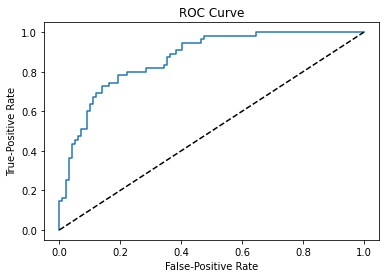

<Figure size 432x288 with 0 Axes>

In [32]:
# ROC curve

from sklearn.metrics import roc_curve, roc_auc_score
yTestPredictProbability = model.predict(X_test_stand)
FPR, TPR, _ = roc_curve(y_test, yTestPredictProbability)

plt.plot(FPR, TPR)
plt.plot([0,1], [0,1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('False-Positive Rate')
plt.ylabel('True-Positive Rate')

plt.show()
plt.clf()

[Scroll Top](#Assignment-3.1)

---

## 12. Area Under Curve (AUC)

In [33]:
#Area under ROC curve
roc_auc_score(y_test,yTestPredictProbability)

0.8685032139577594

[Scroll Top](#Assignment-3.1)

---

## 13. Conclusion

We predicted if a person has diabeties or not by building DNN model on Pima Indian Diabetic Dataset. We also plotted ROC and accuracy vs epoch. We are able to predict with accuracy of ~86%.

[Scroll Top](#Assignment-3.1)

<div class="alert alert-block alert-info">
    <b>Copyright</b> 2020 Srushti Dhamangaonkar<br>
    <br>Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:<br>
    <br>The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.<br>
    <br>THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
    <br><br>
    
<div class="text-center">
    <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br>
</div></div>